In [ ]:
#pip install dtale

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
warnings.filterwarnings('ignore')
trans=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
newcust=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')
custdem=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
custadd=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')

In [4]:
trans.columns = trans.iloc[0]
trans = trans[1:]
newcust.columns = newcust.iloc[0]
newcust = newcust[1:]
custdem.columns = custdem.iloc[0]
custdem = custdem[1:]
custadd.columns = custadd.iloc[0]
custadd = custadd[1:]

In [5]:
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [6]:
custadd.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [8]:
trans["transaction_id"] = trans["transaction_id"].astype(str).astype(int)
trans["product_id"] = trans["product_id"].astype(str).astype(int)
trans["customer_id"] = trans["customer_id"].astype(str).astype(int)
trans["list_price"] = trans["list_price"].astype(str).astype(float)
trans["standard_cost"] = trans["standard_cost"].astype(str).astype(float)
trans["product_first_sold_date"] = trans["product_first_sold_date"].astype(str).astype(float)
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], unit='s')
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], format = '%Y-%m-%d %H:%M:%S')
trans['product_first_sold_date'].head()
trans['transaction_month'] = trans['transaction_date'].dt.strftime('%b')

In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
trans.dropna(inplace=True)
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,Oct
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,Aug
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,Jun
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,Nov
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,Apr
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,Jul


In [ ]:
trans.isna().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
transaction_month          0
dtype: int64

In [ ]:
trans['profit'] = trans['list_price']-trans['standard_cost']
trans['profit_margin'] = trans['list_price']*100/trans['standard_cost']

In [ ]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit,profit_margin
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb,17.87,133.327117
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May,1702.55,537.763550
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,Oct,1544.61,720.774054
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,Aug,817.36,314.473891
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,Oct,1055.82,248.816034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,Jun,802.26,166.666113
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,Nov,104.24,133.331202
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,Apr,1592.19,3661.149631
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,Jul,91.15,166.664229


In [ ]:
custdem = custdem[custdem['DOB'].notna()]
custdem['DOB'] = pd.to_datetime(custdem['DOB'], format = '%Y-%m-%d %H:%M:%S')
custdem["Age"] = custdem["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

In [ ]:
custdem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,68
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,41
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,67
4,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,60
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14,46
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19,46
3997,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1,20
3999,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10,48


In [ ]:
custdem["customer_id"] = custdem["customer_id"].astype(str).astype(int)

In [ ]:
custdem["past_3_years_bike_related_purchases"] = custdem["past_3_years_bike_related_purchases"].astype(str).astype(int)

In [ ]:
custdem["tenure"] = custdem["tenure"].astype(str).astype(int)

In [ ]:
custdem.drop(columns=['default'],inplace=True)

In [ ]:
custdem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3416 non-null   object        
 7   job_industry_category                3257 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car    

In [ ]:
custdem.last_name = custdem.last_name.fillna('')

In [ ]:
custdem.reset_index(inplace=True,drop=True)

In [ ]:
custdem.dropna(inplace=True)


In [ ]:
custdem.isna().sum()

0
customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [ ]:
custdem.loc[custdem['Age'] < 100, 'Age_category'] = 'Senior Citizen [>60]'
custdem.loc[custdem['Age'] < 61, 'Age_category'] = 'Senior Adult [50 to 60]'
custdem.loc[custdem['Age'] < 50, 'Age_category'] = 'Adult [25 to 49]'
custdem.loc[custdem['Age'] < 24, 'Age_category'] = 'Youth [<24]'

In [ ]:
custdem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_category
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,68,Senior Citizen [>60]
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,41,Adult [25 to 49]
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,67,Senior Citizen [>60]
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,48,Adult [25 to 49]
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,33,Adult [25 to 49]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10,47,Adult [25 to 49]
3907,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12,32,Adult [25 to 49]
3908,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,46,Adult [25 to 49]
3909,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,46,Adult [25 to 49]


In [ ]:
custdem['gender'].replace('F', 'Female',inplace=True)
custdem['gender'].replace('Femal', 'Female',inplace=True)

In [ ]:
custdem.dropna(inplace=True)

In [ ]:
custdem = custdem[custdem.gender != 'U']

In [ ]:
custadd

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
custadd['state'].replace('Victoria', 'VIC',inplace=True)
custadd['state'].replace('New South Wales', 'NSW',inplace=True)

In [ ]:
custadd.dtypes

0
customer_id           object
address               object
postcode              object
state                 object
country               object
property_valuation    object
dtype: object

In [ ]:
custadd["customer_id"] = custadd["customer_id"].astype(str).astype(int)
custadd["postcode"] = custadd["postcode"].astype(str).astype(int)
custadd["property_valuation"] = custadd["property_valuation"].astype(str).astype(int)

In [ ]:
trans.reset_index(drop=True)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit,profit_margin
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb,17.87,133.327117
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May,1702.55,537.763550
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,Oct,1544.61,720.774054
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,Aug,817.36,314.473891
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,Oct,1055.82,248.816034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,Jun,802.26,166.666113
19441,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,Nov,104.24,133.331202
19442,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,Apr,1592.19,3661.149631
19443,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,Jul,91.15,166.664229


In [ ]:
custadd.reset_index(drop=True)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
custdem.reset_index(drop=True)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_category
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,68,Senior Citizen [>60]
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,41,Adult [25 to 49]
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,67,Senior Citizen [>60]
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,48,Adult [25 to 49]
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,33,Adult [25 to 49]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10,47,Adult [25 to 49]
2860,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12,32,Adult [25 to 49]
2861,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,46,Adult [25 to 49]
2862,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,46,Adult [25 to 49]


In [ ]:
custadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
newcust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [ ]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

In [ ]:
newcust["past_3_years_bike_related_purchases"] = newcust["past_3_years_bike_related_purchases"].astype(str).astype(int)
newcust["tenure"] = newcust["tenure"].astype(str).astype(int)
newcust["postcode"] = newcust["postcode"].astype(str).astype(int)
newcust["property_valuation"] = newcust["property_valuation"].astype(str).astype(int)
newcust["Rank"] = newcust["Rank"].astype(str).astype(int)
newcust["Value"] = newcust["Value"].astype(str).astype(float)

In [ ]:
newcust['DOB'] = pd.to_datetime(newcust['DOB'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
newcust.dtypes

0
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [ ]:
newcust.isna().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [ ]:
newcust.last_name = newcust.last_name.fillna('')

In [ ]:
newcust.dropna(subset=['job_title','job_industry_category'], how='all',inplace=True)
newcust.isna().sum()

0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                               84
job_industry_category                  143
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [ ]:
newcust.reset_index(inplace=True,drop=True)

In [ ]:
for i in range(len(newcust)):
    if(newcust.job_industry_category.isna()[i]):
        for j in range(len(newcust)):
            if(newcust.job_title[j]==newcust.job_title[i] and newcust.job_industry_category.isna()[j]==False):
                newcust.job_industry_category[i]=newcust.job_industry_category[j]
                break

In [ ]:
newcust.isna().sum()

0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                              84
job_industry_category                   6
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Rank                                    0
Value                                   0
dtype: int64

In [ ]:
newcust.dropna(inplace=True)

In [ ]:
newcust["Age"] = newcust["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

In [ ]:
newcust.loc[newcust['Age'] < 100, 'Age_category'] = 'Senior Citizen [>60]'
newcust.loc[newcust['Age'] < 61, 'Age_category'] = 'Senior Adult [50 to 60]'
newcust.loc[newcust['Age'] < 50, 'Age_category'] = 'Adult [25 to 49]'
newcust.loc[newcust['Age'] < 24, 'Age_category'] = 'Youth [<24]'

In [ ]:
newcust.to_csv('newcust.csv',index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender','job_title','job_industry_category', 'wealth_segment','state','owns_car','Age_category']
newcust[cols] = newcust[cols].apply(LabelEncoder().fit_transform)
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_category
0,Chickie,Brister,1,86,1957-07-12,69,5,2,N,1,14,45 Shopko Center,4500,1,Australia,6,1,1.718750,64,2
1,Morly,Genery,1,69,1970-03-22,159,6,2,N,0,16,14 Mccormick Park,2113,0,Australia,11,1,1.718750,51,1
2,Ardelis,Forrester,0,10,1974-08-28,134,2,0,N,0,10,5 Colorado Crossing,3505,2,Australia,5,1,1.718750,47,0
3,Lucine,Stutt,0,64,1979-01-28,3,5,0,N,1,5,207 Annamark Plaza,4814,1,Australia,1,4,1.703125,42,0
4,Melinda,Hadlee,0,34,1965-09-21,66,2,0,N,0,19,115 Montana Place,2093,0,Australia,9,4,1.703125,56,1


In [ ]:
import dtale
dtale.show(newcust)

ModuleNotFoundError: ignored

In [ ]:
newcust.wealth_segment.unique()

array([2, 0, 1])

In [ ]:
#['state', 'gender', 'owns_car', 'Age_category', 'job_industry_category', 'wealth_segment']

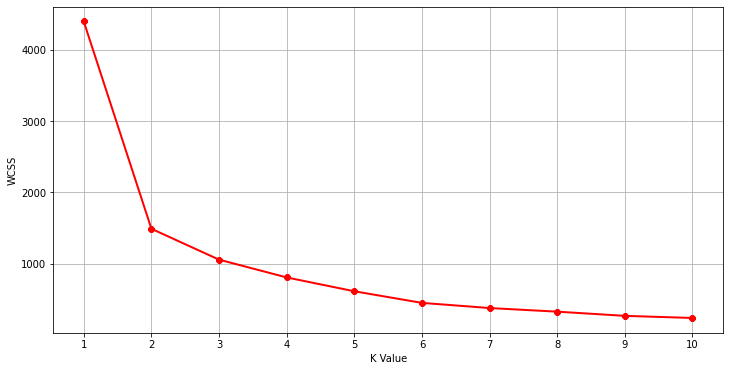

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(newcust.loc[:,['Age', 'job_industry_category']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
x=newcust.loc[:,['Age', 'job_industry_category']]
kmeans=KMeans(n_clusters=2)
label=kmeans.fit_predict(x)
newcust["label1"] = label

In [ ]:
print(kmeans.cluster_centers_)

[[5.71954023 1.24597701]
 [2.06864989 1.26773455]]


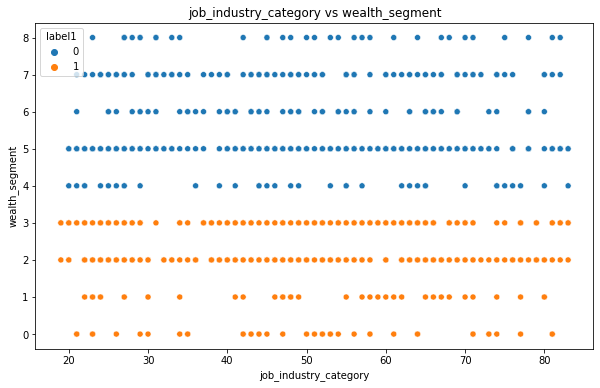

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'job_industry_category',hue="label1",  legend='full',data = newcust)
plt.xlabel('job_industry_category')
plt.ylabel('wealth_segment') 
plt.title('job_industry_category vs wealth_segment')
plt.show()

In [ ]:
import dtale

dtale.show(trans)

In [ ]:
dtale.show(custadd)

In [ ]:
dtale.show(custdem)

In [ ]:
sns.pairplot(custdem)

In [ ]:
sns.pairplot(custadd)

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(custadd.state.unique(), custadd["state"].value_counts())
plt.show()

In [ ]:
custadd["state"].value_counts()

In [ ]:
custdem["gender"].value_counts()

In [ ]:
trans["transaction_month"].value_counts()

In [ ]:
trans["brand"].value_counts()

In [ ]:
results2 = trans.groupby("brand").sum()
results2

In [ ]:
results2["profit"]